In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [3]:
df=pd.read_csv("/content/tips - tips.csv")

In [4]:
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,NaN,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.isnull().sum()

Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  205 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [7]:
df.isna().sum()

Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

In [8]:
df.isnull().mean()

Unnamed: 0    0.000000
total_bill    0.159836
tip           0.000000
sex           0.000000
smoker        0.000000
day           0.000000
time          0.000000
size          0.000000
dtype: float64

In [9]:
def impute_nan(df, variable, method):
    df[variable] = df[variable].fillna(method)

In [10]:
method = df.total_bill.median()

In [11]:
impute_nan(df,'total_bill',method)

In [12]:
df.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,19.44,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
df.isnull().sum()

Unnamed: 0    0
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
#Q2 Handle the categorical data in the tips dataset with the relevant approaches such as label-encoding, one hot encoding, ordinal encoding.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [15]:
ohe=OneHotEncoder()

In [16]:
ohe.fit_transform(df[['sex','smoker','day','time']]).toarray()

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [17]:
#Q3 Perform feature scaling techniques such as min-max normalization, standardization, z-score, on the tips dataset.

In [18]:
from sklearn.preprocessing import MinMaxScaler
mi = MinMaxScaler()

In [19]:
df_minmax = mi.fit_transform(df[['total_bill','tip']])

In [20]:
dff=pd.DataFrame(df_minmax,columns=['total_bill','tip'])

In [21]:
dff.sample(5)

,total_bill,tip
115,0.298282,0.277778
26,0.215752,0.111111
41,0.301424,0.171111
78,0.412442,0.222222
68,0.359447,0.112222


(array([ 1.,  6., 10.,  0., 24., 37., 67., 23., 18., 13., 10.,  9.,  5.,
         7.,  3.,  4.,  1.,  2.,  3.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

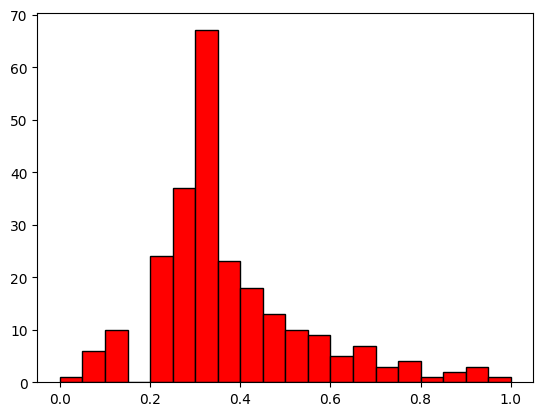

In [22]:
import matplotlib.pyplot as plt
plt.hist(dff['total_bill'], bins = 20,color='red',edgecolor='black')

In [23]:
#standardization

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
s = StandardScaler()

In [26]:
df_scaled = s.fit_transform(df[['total_bill','tip']])

In [27]:
df_scaled

array([[-4.99243641e-01, -1.43994695e+00],
       [-1.98219022e-01, -9.69205340e-01],
       [-5.31753091e-03,  3.63355539e-01],
       [ 3.22737871e-01,  2.25754144e-01],
       [ 4.34547015e-01,  4.43019505e-01],
       [ 5.20554049e-01,  1.23965916e+00],
       [-1.50921196e+00, -7.22971264e-01],
       [ 7.15912884e-01,  8.81527488e-02],
       [-7.38834665e-01, -7.51939979e-01],
       [-7.70780134e-01,  1.67816714e-01],
       [-1.98219022e-01, -9.32994446e-01],
       [ 1.74553995e+00,  1.44968234e+00],
       [-6.92145132e-01, -1.03438495e+00],
       [-3.22314885e-01,  1.24660453e-03],
       [-7.64636775e-01,  1.57309619e-02],
       [ 6.47167683e-02,  6.67527044e-01],
       [-1.98219022e-01, -9.61963161e-01],
       [-5.85250675e-01,  5.15441291e-01],
       [-5.01700985e-01,  3.63355539e-01],
       [-4.95497199e-02,  2.54722859e-01],
       [-3.84977153e-01,  7.83401903e-01],
       [-9.37819088e-02, -1.79807863e-01],
       [-6.49141615e-01, -5.56401155e-01],
       [ 2.

In [29]:
dff.head(5)

,total_bill,tip
0,0.291579,0.001111
1,0.342899,0.073333
2,0.375786,0.277778
3,0.431713,0.256667
4,0.450775,0.290000


In [32]:
zscore=(dff['total_bill']-dff['total_bill'].mean())/dff['total_bill'].std()
zscore

0     -0.498220
1     -0.197812
2     -0.005307
3      0.322076
4      0.433656
         ...   
239    0.978067
240    0.751229
241    0.198235
242   -0.396449
243   -0.278738
Name: total_bill, Length: 244, dtype: float64

In [33]:
#Q4 Create a new feature representing the average tip percentage for each dining party size.

In [34]:
df.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,19.44,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
df['avg_tip_per_size'] = df.groupby('size')['tip'].transform('mean')

In [36]:
df.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,avg_tip_per_size
0,0,16.99,1.01,Female,No,Sun,Dinner,2,2.582308
1,1,19.44,1.66,Male,No,Sun,Dinner,3,3.393158
2,2,21.01,3.50,Male,No,Sun,Dinner,3,3.393158
3,3,23.68,3.31,Male,No,Sun,Dinner,2,2.582308
4,4,24.59,3.61,Female,No,Sun,Dinner,4,4.135405


In [37]:
#Q5 Create a new feature based on total bill and tips if total bill is greater than 10$ and tips is greater than 3$ mark as Highest-bills-with-tips otherwise Normal-bills

In [38]:
def categorize_bills(total_bill, tip):
    if total_bill > 10 and tip > 3:
        return 'Highest-bills-with-tips'
    else:
        return 'Normal-bills'

df['bill_category'] = df.apply(lambda row: categorize_bills(row['total_bill'], row['tip']), axis=1)

In [39]:
df.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,avg_tip_per_size,bill_category
0,0,16.99,1.01,Female,No,Sun,Dinner,2,2.582308,Normal-bills
1,1,19.44,1.66,Male,No,Sun,Dinner,3,3.393158,Normal-bills
2,2,21.01,3.50,Male,No,Sun,Dinner,3,3.393158,Highest-bills-with-tips
3,3,23.68,3.31,Male,No,Sun,Dinner,2,2.582308,Highest-bills-with-tips
4,4,24.59,3.61,Female,No,Sun,Dinner,4,4.135405,Highest-bills-with-tips
